# Does weakness in the Rule of Law cause corruption/trafficking?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from src import RWE

## <u>Causal element description</u>

- Outcome: Political stability (continuous)

- Exposure: Rule of law (continuous; but could be binarized based on threshold)

- Confounder: Means of Control (binary)

## Load Files

In [2]:
# politicial stability
FILEPATH_polstab = 'C:/Users/t-jongshin/Desktop/workstation/2021_rwe/dev_notebook/showWhy_tutorial/asset/trafficking/wgi-polstab.xlsx'

# rule of law
FILEPATH_ruleoflaw = 'C:/Users/t-jongshin/Desktop/workstation/2021_rwe/dev_notebook/showWhy_tutorial/asset/trafficking/wgi-ruleoflaw.xlsx'

# means of control
FILEPATH_control = 'C:/Users/t-jongshin/Desktop/workstation/2021_rwe/dev_notebook/showWhy_tutorial/asset/trafficking/The Global Dataset 14 Apr 2020.csv'

# country codes
FILEPATH_codes = 'C:/Users/t-jongshin/Desktop/workstation/2021_rwe/dev_notebook/showWhy_tutorial/asset/trafficking/country_codes.xlsx'

In [3]:
dat_polstab = pd.read_excel(FILEPATH_polstab)
dat_ruleoflaw = pd.read_excel(FILEPATH_ruleoflaw)
dat_control = pd.read_csv(FILEPATH_control)
dat_codes = pd.read_excel(FILEPATH_codes)

## Inspecting raw exposure and outcome datasets

In [4]:
dat_polstab #outcome

,Unnamed: 0,Unnamed: 1,1996,1996.1,1996.2,1996.3,1996.4,1996.5,1998,1998.1,...,2018.2,2018.3,2018.4,2018.5,2019,2019.1,2019.2,2019.3,2019.4,2019.5
0,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,...,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper
1,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,95.714287,81.904762,99.523811,1.357372,0.271196,3,95.238098,79.047623,99.523811
2,Andorra,ADO,1.170157,0.613507,1,89.361702,52.127659,100,1.183645,0.575733,...,2,97.619049,81.428574,99.523811,1.615139,0.290278,3,98.571426,90.952377,100
3,Afghanistan,AFG,-2.414042,0.475315,2,2.12766,0,6.914894,-2.422996,0.435324,...,6,0.47619,0,2.380952,-2.649407,0.241833,6,0.952381,0,2.857143
4,Angola,AGO,-2.057286,0.373857,4,3.723404,0,9.042553,-2.313072,0.345463,...,6,35.714287,21.904762,49.047619,-0.311101,0.239387,6,35.238094,20.952381,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Serbia,SRB,-1.03339,0.373857,4,17.021276,6.382979,31.914894,-2.139184,0.345463,...,8,47.142857,35.238094,58.57143,-0.091665,0.233699,7,45.238094,28.095238,57.142857
211,South Africa,ZAF,-0.37717,0.373857,4,32.446808,18.085106,54.787235,-0.543384,0.345463,...,9,39.047619,26.190475,53.333332,-0.217931,0.227832,8,40,23.333334,53.809525
212,"Congo, Dem. Rep.",ZAR,-2.681914,0.421902,3,0,0,3.723404,-2.844653,0.381321,...,6,4.285714,1.428571,6.666667,-1.808007,0.245477,5,5.714286,3.333333,9.047619
213,Zambia,ZMB,-0.159263,0.373857,4,42.021278,21.80851,61.170212,0.219534,0.345463,...,7,50.952381,37.142857,61.42857,-0.102216,0.239356,6,43.809525,27.619047,56.666668


In [5]:
dat_ruleoflaw #exposure

,Unnamed: 0,Unnamed: 1,1996,1996.1,1996.2,1996.3,1996.4,1996.5,1998,1998.1,...,2018.2,2018.3,2018.4,2018.5,2019,2019.1,2019.2,2019.3,2019.4,2019.5
0,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,...,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper
1,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,87.019234,78.846153,91.82692,1.263128,0.211013,3,86.53846,78.846153,91.82692
2,Andorra,ADO,1.158363,0.388865,2,86.432159,63.316582,96.984924,1.213209,0.365499,...,1,90.865387,77.403847,100,1.579939,0.495012,1,90.865387,76.92308,100
3,Afghanistan,AFG,-1.788075,0.350509,3,1.507538,0,12.562814,-1.73714,0.331571,...,11,4.326923,1.442308,6.730769,-1.713527,0.157939,11,4.326923,0.961538,5.288462
4,Angola,AGO,-1.630469,0.212429,6,3.517588,0,10.050251,-1.700753,0.209898,...,11,14.423077,7.211538,21.634615,-1.054343,0.150109,12,13.461538,6.730769,20.673077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Serbia,SRB,-1.262493,0.220566,5,10.552764,3.517588,21.105528,-1.260456,0.211765,...,11,49.03846,38.942307,56.73077,-0.11907,0.148367,11,50,41.346153,57.692307
211,South Africa,ZAF,0.087929,0.194236,8,55.276382,43.718594,62.311558,0.270558,0.189727,...,16,50.96154,41.826923,58.173077,-0.076408,0.136811,16,50.96154,44.23077,58.173077
212,"Congo, Dem. Rep.",ZAR,-1.876563,0.315425,4,1.005025,0,9.045226,-2.129996,0.270483,...,12,2.884615,0.961538,5.288462,-1.786088,0.156237,12,2.403846,0.961538,5.288462
213,Zambia,ZMB,-0.531715,0.212429,6,34.170853,21.105528,45.728642,-0.370885,0.209898,...,14,41.346153,29.807692,50.48077,-0.462069,0.146301,14,35.096153,25,46.634617


## Clean dataframe for actual data preparation
The raw data above were actually cleaned once, but the structure of these raw datasets is inappropriate to the ShowWhy data prep pipeline, thus they need to be cleaned again for ShowWhy data prep scheme.

In [6]:
def clean_exel(df):
    years = np.unique(np.array(df.iloc[0:,2:].columns).astype(float).astype(int)).astype(int)

    dfa = df.iloc[0:,:2]
    dfb = df.iloc[0:,2:][years]

    new_col = np.array(np.array(dfa.iloc[0]).tolist() + years.tolist())

    newdf = pd.concat([dfa,dfb],axis=1).iloc[1:]

    newdf.columns = new_col

    return newdf

In [7]:
dat_polstab = clean_exel(dat_polstab)
dat_ruleoflaw = clean_exel(dat_ruleoflaw)

In [8]:
dat_polstab

,Country/Territory,Code,1996,1998,2000,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,0.993855,1.379847,1.305753,...,1.100847,1.285738,1.263882,1.312226,1.164568,1.230921,1.284199,1.334757,1.362981,1.357372
2,Andorra,ADO,1.170157,1.183645,1.167002,1.282039,1.464986,1.401487,1.384696,1.348995,...,1.278272,1.302488,1.290351,1.283926,1.286593,1.391288,1.413419,1.421572,1.423969,1.615139
3,Afghanistan,AFG,-2.414042,-2.422996,-2.440187,-2.035389,-2.197809,-2.296179,-2.070934,-2.221302,...,-2.579152,-2.50206,-2.418561,-2.519349,-2.411068,-2.571222,-2.671054,-2.800609,-2.751611,-2.649407
4,Angola,AGO,-2.057286,-2.313072,-2.035583,-1.577046,-1.006538,-1.062798,-0.887544,-0.541986,...,-0.226182,-0.369238,-0.389323,-0.391233,-0.333232,-0.500898,-0.315899,-0.331622,-0.316631,-0.311101
5,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,0.788874,1.193962,1.107798,...,1.373762,1.550928,1.47692,1.53398,1.164255,1.249272,1.315344,1.389161,1.293931,1.367357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Serbia,SRB,-1.03339,-2.139184,-1.642953,-0.512326,-0.582105,-0.509061,-0.765158,-0.539612,...,-0.421742,-0.282882,-0.217299,-0.075638,0.184111,0.238982,0.140154,0.086803,0.017284,-0.091665
211,South Africa,ZAF,-0.37717,-0.543384,-0.225485,-0.253671,-0.311745,-0.131361,-0.162605,0.048197,...,-0.029427,0.024032,-0.025387,-0.046295,-0.146389,-0.212993,-0.141504,-0.277548,-0.219112,-0.217931
212,"Congo, Dem. Rep.",ZAR,-2.681914,-2.844653,-2.476551,-1.977575,-2.028027,-2.388028,-2.132514,-2.250013,...,-2.196742,-2.212989,-2.085893,-2.192191,-2.167921,-2.150854,-2.234622,-2.351179,-2.107878,-1.808007
213,Zambia,ZMB,-0.159263,0.219534,0.033903,-0.278804,0.217706,0.189577,0.10505,0.3625,...,0.515351,0.509774,0.660963,0.435933,0.156212,0.151695,0.142808,0.14618,0.093829,-0.102216


In [9]:
dat_ruleoflaw

,Country/Territory,Code,1996,1998,2000,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,0.929806,0.857203,0.820513,...,1.422983,1.330821,1.316215,1.299766,1.038312,1.261027,1.261745,1.330984,1.296759,1.263128
2,Andorra,ADO,1.158363,1.213209,1.312131,1.252001,1.087207,1.210473,0.976217,0.865921,...,1.204553,1.407835,1.407764,1.409044,1.641953,1.575988,1.577925,1.60133,1.606789,1.579939
3,Afghanistan,AFG,-1.788075,-1.73714,-1.778437,-1.670823,-1.553829,-1.697143,-1.658668,-1.863189,...,-1.845436,-1.896632,-1.643165,-1.597314,-1.445648,-1.50404,-1.49819,-1.569692,-1.668021,-1.713527
4,Angola,AGO,-1.630469,-1.700753,-1.663307,-1.617329,-1.52141,-1.496279,-1.427661,-1.300314,...,-1.265287,-1.265381,-1.269548,-1.267904,-1.118136,-1.081932,-1.08732,-1.10426,-1.047832,-1.054343
5,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,1.159125,1.644845,1.599525,...,1.382129,1.360597,1.364446,1.367896,0.018863,-0.039253,-0.084585,-0.104195,-0.098901,0.355737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Serbia,SRB,-1.262493,-1.260456,-1.271872,-0.861452,-0.85236,-0.723167,-0.906719,-0.53183,...,-0.373143,-0.289622,-0.356304,-0.326106,-0.149682,-0.117173,-0.15925,-0.19234,-0.1466,-0.11907
211,South Africa,ZAF,0.087929,0.270558,0.202503,0.132499,0.124147,0.113917,0.114751,0.255048,...,0.141176,0.152451,0.110432,0.158148,0.18279,0.088227,0.116231,-0.037856,-0.102711,-0.076408
212,"Congo, Dem. Rep.",ZAR,-1.876563,-2.129996,-1.905428,-1.658461,-1.684144,-1.715358,-1.553693,-1.617157,...,-1.62074,-1.618146,-1.657,-1.573436,-1.451048,-1.572547,-1.618508,-1.689818,-1.783715,-1.786088
213,Zambia,ZMB,-0.531715,-0.370885,-0.481924,-0.310706,-0.390432,-0.489625,-0.520099,-0.539625,...,-0.490245,-0.456432,-0.365196,-0.267562,-0.236549,-0.229715,-0.30044,-0.325046,-0.34505,-0.462069


## Data Preparation for exposure and outcome
This may or may not be reasonable to implement such veratile functionalities in ShowWhy, but for time-series, having dedicated columns for time and features is probably desirable structure.

In [10]:
## OUTCOME PREP PROCESS

temp = dat_polstab.T.iloc[1:,:]
temp.columns = temp.iloc[0]
temp = temp.iloc[1:,:]
temp = temp.dropna(axis=1)
temp['year'] = temp.index
temp = temp.melt(id_vars=['year'])
temp['value'] = temp['value'].astype(float)
temp

,year,Code,value
0,1996,ADO,1.170157
1,1998,ADO,1.183645
2,2000,ADO,1.167002
3,2002,ADO,1.282039
4,2003,ADO,1.464986
...,...,...,...
3964,2015,ZWE,-0.618156
3965,2016,ZWE,-0.619938
3966,2017,ZWE,-0.708677
3967,2018,ZWE,-0.713406


In [11]:
## EXPOSURE PREP PROCESS

temp2 = dat_ruleoflaw.T.iloc[1:,:]
temp2.columns = temp2.iloc[0]
temp2 = temp2.iloc[1:,:]
temp2 = temp2.dropna(axis=1)
temp2['year'] = temp2.index
temp2 = temp2.melt(id_vars=['year'])
temp2['value'] = temp2['value'].astype(float)
temp2

,year,Code,value
0,1996,ADO,1.158363
1,1998,ADO,1.213209
2,2000,ADO,1.312131
3,2002,ADO,1.252001
4,2003,ADO,1.087207
...,...,...,...
4153,2015,ZWE,-1.317532
4154,2016,ZWE,-1.368230
4155,2017,ZWE,-1.377855
4156,2018,ZWE,-1.273343


### Get the overlapping countries
The countries involved in both exposure and outcome are different, and the intersect of these sets need to be found

In [12]:
int_col = np.intersect1d(temp['Code'],temp2['Code'])

### Get common countries for the exposure 

In [13]:
temp = pd.merge(temp,pd.DataFrame({'Code':int_col}), on='Code')
temp

,year,Code,value
0,1996,ADO,1.170157
1,1998,ADO,1.183645
2,2000,ADO,1.167002
3,2002,ADO,1.282039
4,2003,ADO,1.464986
...,...,...,...
3964,2015,ZWE,-0.618156
3965,2016,ZWE,-0.619938
3966,2017,ZWE,-0.708677
3967,2018,ZWE,-0.713406


### Get common countries for the outcome

In [14]:
temp2 = pd.merge(temp2,pd.DataFrame({'Code':int_col}), on='Code')
temp2

,year,Code,value
0,1996,ADO,1.158363
1,1998,ADO,1.213209
2,2000,ADO,1.312131
3,2002,ADO,1.252001
4,2003,ADO,1.087207
...,...,...,...
3964,2015,ZWE,-1.317532
3965,2016,ZWE,-1.368230
3966,2017,ZWE,-1.377855
3967,2018,ZWE,-1.273343


#### Luckily, there was full set of years for each country (labeled as "Code"), otherwise, we would have to either filter out certain years or find a way to impute those missing values

### Data visualization and basic analytic
It may be good to visualize relationship between exposure and outcome to corroborate user's domain knowledge. For this tutorial, our belief was positive correlation between weakness of rule of law and corruption/trafficking which is modeled using political stability dataset

### Linear regression on scatter plot looking at the correlation between exposure and outcome

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
X = temp['value'].to_numpy().reshape(-1,1)
y = temp2['value'].to_numpy().reshape(-1,1)

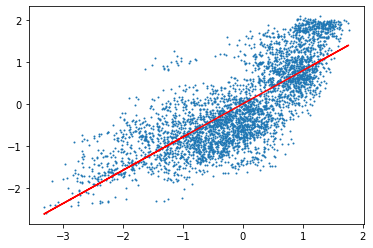

In [17]:
plt.scatter(X,y, s=1)
plt.plot( X, LinearRegression().fit(X,y).predict(X), 'r-')

In [18]:
lr = LinearRegression().fit(X,y)

In [19]:
lr.coef_

array([[0.79365715]])

#### The basic regression tells us that for every one unit of increase in X results in 0.7937 unit increase in y

### Next we will use causal inference method to validate our finding by using mean of control dataset as potential confounders

## Prepare means of control dataset (confounders)

### Inspect the raw dataset

In [20]:
dat_control

,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
1,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
2,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
3,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
4,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,NaN,2019,Case Management,Female,-99,-99,Adult,-99,UG,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99
48797,NaN,2019,Case Management,Female,-99,-99,Adult,-99,UG,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99
48798,NaN,2019,Case Management,Female,-99,-99,Adult,-99,UG,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99
48799,NaN,2019,Case Management,Female,-99,-99,Minor,-99,UG,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99


### Select the columns of interest
We want all the columns that contain means of control information except for the last three features as they are irrelevant

In [21]:
temp_col = np.array(dat_control.columns).astype(str)

temp_idx = []

for i in np.char.find(temp_col,'meansOfControl'):
    
    if i == 0:
        temp_idx.append(True)
        continue
    temp_idx.append(False)

temp_col = ['yearOfRegistration', 'gender', 'citizenship'] + temp_col[temp_idx].astype(str).tolist()[:-3]

temp_col

['yearOfRegistration',
 'gender',
 'citizenship',
 'meansOfControlDebtBondage',
 'meansOfControlTakesEarnings',
 'meansOfControlRestrictsFinancialAccess',
 'meansOfControlThreats',
 'meansOfControlPsychologicalAbuse',
 'meansOfControlPhysicalAbuse',
 'meansOfControlSexualAbuse',
 'meansOfControlFalsePromises',
 'meansOfControlPsychoactiveSubstances',
 'meansOfControlRestrictsMovement',
 'meansOfControlRestrictsMedicalCare',
 'meansOfControlExcessiveWorkingHours',
 'meansOfControlUsesChildren',
 'meansOfControlThreatOfLawEnforcement',
 'meansOfControlWithholdsNecessities',
 'meansOfControlWithholdsDocuments']

In [22]:
dat_control = RWE.rwe_dataprep.drop_df(df=dat_control, choose_columns=temp_col)
dat_control

,yearOfRegistration,gender,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments
0,2002,Female,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
1,2002,Female,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
2,2002,Female,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
3,2002,Female,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
4,2002,Female,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,2019,Female,UG,0,0,0,0,0,0,0,0,0,0,0,0,-99,0,0,0
48797,2019,Female,UG,0,0,0,0,0,0,0,0,0,0,0,0,-99,0,0,0
48798,2019,Female,UG,0,0,0,0,0,0,0,0,0,0,0,0,-99,0,0,0
48799,2019,Female,UG,0,0,0,0,0,0,0,0,0,0,0,0,-99,0,0,0


### Basic stats of the dataset
As can be noticed, the dataset is heavily skewed on gender and contains significant number of missing values. Normally, this would not be considered as quality dataset and should be not used. But for this tutorial, we are going to present use cases of such dataset

In [23]:
# skewed data
dat_control['gender'].describe()

count      48801
unique         2
top       Female
freq       35534
Name: gender, dtype: object

In [24]:
# there are a lot of missing values (ie. -99)
for i in temp_col:
    print(f'''{dat_control[dat_control[i] == -99][i].count().sum()}''')

0
0
0
46305
44804
48548
43637
42745
43952
45980
44961
45292
43181
46302
45484
48650
46793
46217
45527


In [25]:
dat_control

,yearOfRegistration,gender,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments
0,2002,Female,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
1,2002,Female,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
2,2002,Female,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
3,2002,Female,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
4,2002,Female,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,2019,Female,UG,0,0,0,0,0,0,0,0,0,0,0,0,-99,0,0,0
48797,2019,Female,UG,0,0,0,0,0,0,0,0,0,0,0,0,-99,0,0,0
48798,2019,Female,UG,0,0,0,0,0,0,0,0,0,0,0,0,-99,0,0,0
48799,2019,Female,UG,0,0,0,0,0,0,0,0,0,0,0,0,-99,0,0,0


### Change alpha-2 code used in confounder dataset with alpha-3 code used in exposure/outcome dataset
The country code used in confounder dataset is different from the code used in exposure/outcome dataset, so we need to translate the code

In [26]:
dat_codes = dat_codes.iloc[:,2:4]
dat_codes

,Alpha-2 code,Alpha-3 code
0,AF,AFG
1,AL,ALB
2,DZ,DZA
3,AS,ASM
4,AD,AND
...,...,...
244,EH,ESH
245,YE,YEM
246,ZM,ZMB
247,ZW,ZWE


In [27]:
# renaming columns for merging
dat_codes.columns = ['citizenship', 'new_citizenship']

In [28]:
dat_control['citizenship'] = pd.merge(dat_control, dat_codes, on='citizenship', how='left')['new_citizenship']
dat_control

,yearOfRegistration,gender,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments
0,2002,Female,COL,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
1,2002,Female,COL,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
2,2002,Female,COL,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
3,2002,Female,COL,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
4,2002,Female,COL,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,2019,Female,UGA,0,0,0,0,0,0,0,0,0,0,0,0,-99,0,0,0
48797,2019,Female,UGA,0,0,0,0,0,0,0,0,0,0,0,0,-99,0,0,0
48798,2019,Female,UGA,0,0,0,0,0,0,0,0,0,0,0,0,-99,0,0,0
48799,2019,Female,UGA,0,0,0,0,0,0,0,0,0,0,0,0,-99,0,0,0


### Impute missing values
As there are too many missing values, binary values are treated as probabilities and the effect of missing values is assumed to be statistically insignificant. Aggregation over time is done by binarizing the mean probability (i.e. True if > 0.5). Normally, however, such dataset would not be qualified for the analysis, but for the purpose of demonstration, aforementioned approach is used to compensate for missing values.

In [29]:
## Another way to visualize missingness of data
## There are missing values across years
dat_control.groupby(by='citizenship').agg({'yearOfRegistration': lambda x: set(x), 'meansOfControlDebtBondage': lambda x: set(x)}).T

citizenship,AFG,ALB,BFA,BGD,BGR,BLR,BOL,CHN,CIV,COD,...,SEN,SLE,THA,TJK,TKM,UGA,UKR,USA,UZB,VNM
yearOfRegistration,"{2013, 2014, 2015}",{2005},{2010},{2015},"{2005, 2007}","{2016, 2017, 2018, 2004, 2005, 2006, 2007, 200...",{2012},"{2017, 2018}",{2007},{2007},...,"{2008, 2010, 2007}","{2008, 2018}",{2016},"{2011, 2005}","{2010, 2011}","{2019, 2014}","{2016, 2017, 2018, 2002, 2003, 2005, 2006, 200...","{2016, 2017, 2018, 2015}","{2017, 2005, 2011, 2013, 2015}","{2017, 2018}"
meansOfControlDebtBondage,"{1, -99}",{-99},{-99},{-99},{-99},"{1, -99}",{-99},{-99},{-99},{-99},...,{-99},{-99},{-99},{-99},{-99},"{0, -99}","{0, 1, -99}","{1, -99}","{1, -99}",{0}


In [30]:
def binarize(cell):
    if cell == 0 or cell == 1:
        return cell
    else:
        return float('NaN')

ttail = dat_control[temp_col].iloc[:,3:].applymap(lambda x: binarize(x))
thead = dat_control[temp_col].iloc[:,:3]

new_dat_control = pd.concat([thead,ttail], axis=1)
new_dat_control

,yearOfRegistration,gender,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments
0,2002,Female,COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,Female,COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,Female,COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,Female,COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,Female,COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,2019,Female,UGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
48797,2019,Female,UGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
48798,2019,Female,UGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
48799,2019,Female,UGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0


In [31]:
new_dat_control = new_dat_control.iloc[new_dat_control['citizenship'].dropna().index,:]
new_dat_control

,yearOfRegistration,gender,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments
0,2002,Female,COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,Female,COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,Female,COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,Female,COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,Female,COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,2019,Female,UGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
48797,2019,Female,UGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
48798,2019,Female,UGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
48799,2019,Female,UGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0


In [32]:
new_dat_control = new_dat_control.groupby(by='citizenship', as_index=False).mean().drop(labels=['yearOfRegistration'],axis=1)
new_dat_control

,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments
0,AFG,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
1,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BLR,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000
6,BOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CHN,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN,1.00000,1.000000,NaN
8,CIV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,COD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
templist = new_dat_control.iloc[:,1:].dropna(how='all').describe().iloc[0,:]
valid_confounders = templist[templist > 15].index
valid_confounders

Index(['meansOfControlDebtBondage', 'meansOfControlTakesEarnings',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlFalsePromises',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments'],
      dtype='object')

In [34]:
def binarize_prob(cell):
    try:
        if type(cell) != 'str':
            if cell < 0.5:
                return 0
            elif cell >= 0.5:
                return 1
        return cell
    except:
        return cell

new_dat_control = new_dat_control[['citizenship']+ list(valid_confounders)].applymap(lambda x: binarize_prob(x)).dropna()
new_dat_control

,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlFalsePromises,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments
5,BLR,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
16,IDN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
18,KEN,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
19,KGZ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
20,KHM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,LKA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
28,MMR,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
32,PHL,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39,UGA,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
40,UKR,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [35]:
# these are the list of countries with full set of means of Control data
new_dat_control[['citizenship']]

,citizenship
5,BLR
16,IDN
18,KEN
19,KGZ
20,KHM
23,LKA
28,MMR
32,PHL
39,UGA
40,UKR


In [36]:
exposure = pd.merge(left=temp, right=new_dat_control[['citizenship']], left_on='Code', right_on='citizenship').groupby('citizenship', as_index=False).mean()
exposure.columns = ['citizenship', 'exposure']
exposure

,citizenship,exposure
0,BLR,0.203177
1,IDN,-1.049341
2,KEN,-1.184274
3,KGZ,-0.756272
4,KHM,-0.358568
5,LKA,-0.901150
6,MMR,-1.158066
7,PHL,-1.218520
8,UGA,-1.026693
9,UKR,-0.678189


In [37]:
outcome = pd.merge(left=temp2, right=new_dat_control[['citizenship']], left_on='Code', right_on='citizenship').groupby('citizenship', as_index=False).mean()
outcome.columns = ['citizenship', 'outcome']
outcome

,citizenship,outcome
0,BLR,-1.016856
1,IDN,-0.593309
2,KEN,-0.772309
3,KGZ,-1.021725
4,KHM,-1.105553
5,LKA,0.043010
6,MMR,-1.404958
7,PHL,-0.398166
8,UGA,-0.430650
9,UKR,-0.796902


## Merging (joining) three datasets

In [38]:
micro_data = pd.merge(pd.merge(exposure, outcome), new_dat_control)
micro_data

,citizenship,exposure,outcome,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlFalsePromises,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments
0,BLR,0.203177,-1.016856,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,IDN,-1.049341,-0.593309,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,KEN,-1.184274,-0.772309,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,KGZ,-0.756272,-1.021725,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,KHM,-0.358568,-1.105553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,LKA,-0.901150,0.043010,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,MMR,-1.158066,-1.404958,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,PHL,-1.218520,-0.398166,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,UGA,-1.026693,-0.430650,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,UKR,-0.678189,-0.796902,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Causal Inference via DoWhy api
Here all the means of control columns are used as confounders

In [39]:
CM = RWE.rwe_inference.showWhy(df=micro_data, treatment='exposure', outcome='outcome', common_causes=list(valid_confounders))

In [40]:
CM.dowhy_identify()

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
───────────(Expectation(outcome|meansOfControlThreats,meansOfControlPhysicalAb
d[exposure]                                                                   

                                                                              
use,meansOfControlTakesEarnings,meansOfControlPsychologicalAbuse,meansOfContro
                                                                              

                                                                              
lWithholdsNecessities,meansOfControlDebtBondage,meansOfControlFalsePromises,me
                                                                              

                                                                              
ansOfControlRestrictsMovement,meansOfControlExcessiveWorkingHours,meansOfContr
                                

In [41]:
CM.dowhy_estimate(method='linear', target_units='ate')

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
───────────(Expectation(outcome|meansOfControlThreats,meansOfControlPhysicalAb
d[exposure]                                                                   

                                                                              
use,meansOfControlTakesEarnings,meansOfControlPsychologicalAbuse,meansOfContro
                                                                              

                                                                              
lWithholdsNecessities,meansOfControlDebtBondage,meansOfControlFalsePromises,me
                                                                              

                                                                              
ansOfControlRestrictsMovement,meansOfControlExcessiveWorkingHou

#### The causal estimate is comparable to linear regression coefficient, but there is a small decrease in value

In [42]:
CM.dowhy_refute()

linear linear
Refute: Add a Random Common Cause
Estimated effect:0.7022148683434906
New effect:0.7416202860923721

Refute: Add an Unobserved Common Cause
Estimated effect:0.7022148683434906
New effect:0.6965367252520391

Refute: Use a Placebo Treatment
Estimated effect:0.7022148683434906
New effect:0.028859129056741678
p value:0.2990613947066031

Refute: Use a subset of data
Estimated effect:0.7022148683434906
New effect:0.6903177157244644
p value:0.04113329480640793



#### The refutation seems to check out as well in all four tests where adding random confounders does not affect the causal effect and adding random treatment perturbs the result and the subset of data is representative of the population